## Welcome to Health Bridge by Team Techno Devs

#### Importing Intel(R) Extension for Scikit-Learn for Enhanced Performance

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
data=pd.read_csv("final.csv")

#### Processing Data using LabelEncoder() from sklearn

In [2]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

list=["prognosis"]
for x in list:
    data[x] = label_encoder.fit_transform(data[x])
    
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


#### CSV Data

In [38]:
data.head(506)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


### Model Training
#### Dataset Splitting

In [60]:
X = data.drop(['prognosis'], axis=1)
y = data['prognosis']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X_new, y_new = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [62]:
algorithms = []

#### Training Model using Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

# Describing the Confusion-Matrix of the Model

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print()
print(conf_matrix)
print()
# Evaluate the accuracy of the model
y_pred_proba = logistic_reg.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

print('AUC-ROC:', auc_roc*100)

# Appended the AUC-ROC score of Logistic Regression
algorithms.append(auc_roc*100) 


Confusion Matrix: 

[[85  8]
 [21 86]]

AUC-ROC: 92.16159179981912


Text(0, 0.5, 'Count')

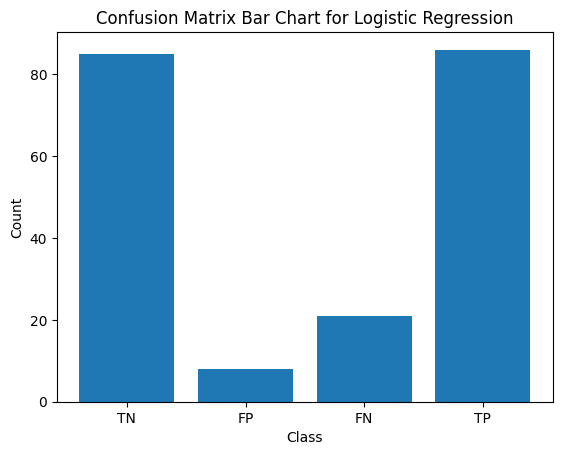

In [64]:
import matplotlib.pyplot as plt
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

plt.bar(['TN', 'FP', 'FN', 'TP'], [tn,fp,fn,tp])
plt.title("Confusion Matrix Bar Chart for Logistic Regression")
plt.xlabel("Class")
plt.ylabel('Count')

#### Plotting Confusion Matrix

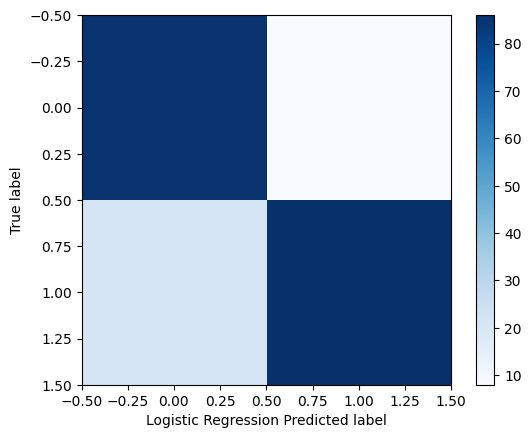

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Logistic Regression Predicted label')
plt.ylabel('True label')
plt.show()

### Training using Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)

print('AUC-ROC:', auc_roc*100)

# Appended AUC-ROC score of RFC
algorithms.append(auc_roc*100)


AUC-ROC: 93.79459350819013


Text(0, 0.5, 'Count')

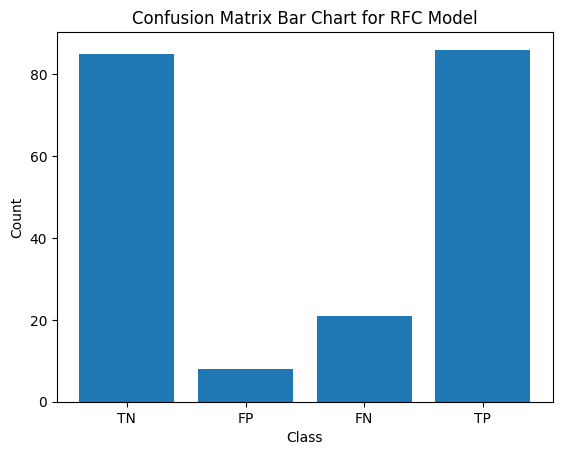

In [67]:
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

plt.bar(['TN', 'FP', 'FN', 'TP'], [tn,fp,fn,tp])
plt.title("Confusion Matrix Bar Chart for RFC Model")
plt.xlabel("Class")
plt.ylabel('Count')

#### Plotting Confusion Matrix

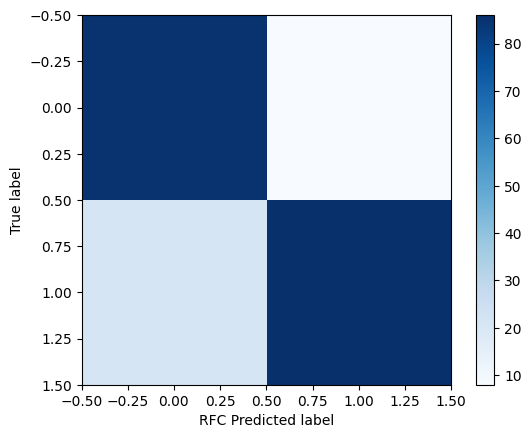

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('RFC Predicted label')
plt.ylabel('True label')
plt.show()

### Training using Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred_proba = dtc.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_pred_proba)

print('AUC-ROC:', auc_roc*100)

# Appended AUC-ROC score of DTC
algorithms.append(auc_roc*100)

AUC-ROC: 87.82534418651392


Text(0, 0.5, 'Count')

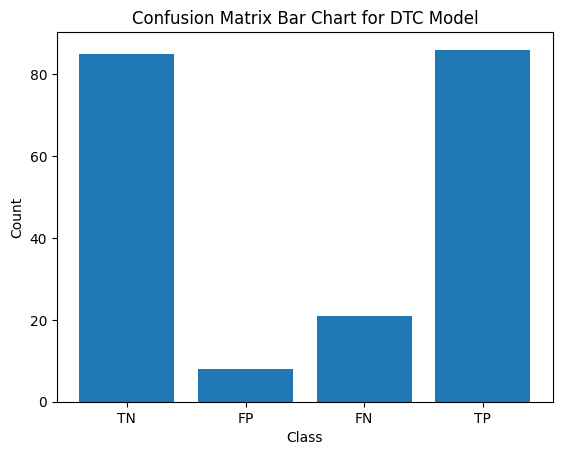

In [70]:
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

plt.bar(['TN', 'FP', 'FN', 'TP'], [tn,fp,fn,tp])
plt.title("Confusion Matrix Bar Chart for DTC Model")
plt.xlabel("Class")
plt.ylabel('Count')

#### Plotting Confusion Matrix

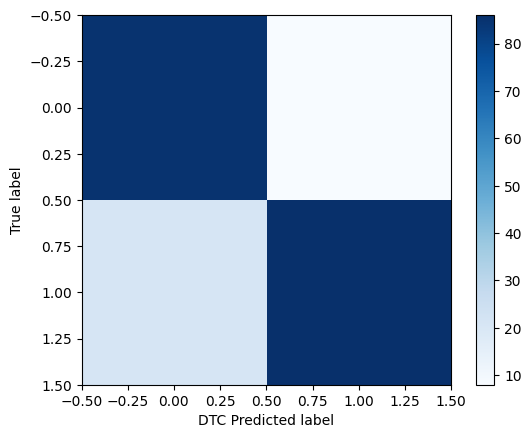

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('DTC Predicted label')
plt.ylabel('True label')
plt.show()

### Choosing the Best Model

In [72]:
models = {'Model': ['Logistic Regression', 'RFC', 'DTC'], 'Value': algorithms}
new = pd.DataFrame(models)
new

,Model,Value
0,Logistic Regression,92.161592
1,RFC,93.794594
2,DTC,87.825344


#### Plotting the values of different model

<Axes: xlabel='Model', ylabel='Value'>

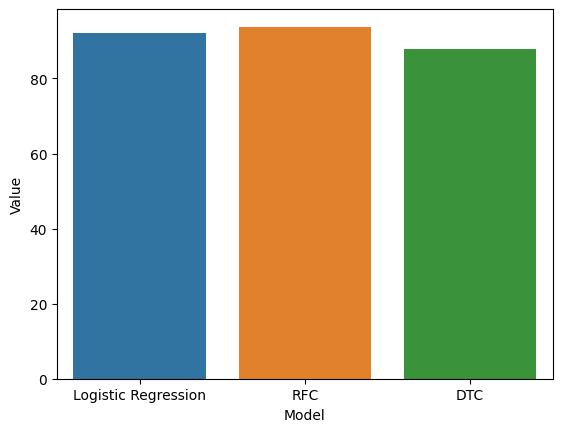

In [73]:
import seaborn as sns
sns.barplot(x=new['Model'],y=new['Value'])

## Hence we settle with Random Forest Classifier

### Stored Diseases for Displaying Predictions

In [74]:
decoded_final = {15: "Fungal Infection",4:"Allergy",16:"GERD",9:"Chronic cholestasis",14:'Drug Reaction',33:'Peptic ulcer diseae',1:'AIDS',12:'Diabetes' ,17:'Gastroenteritis',6:'Bronchial Asthma',23:'Hypertension' ,30:'Migraine',7:'Cervical spondylosis',32:'Paralysis (brain hemorrhage)',28:'Jaundice',29:'Malaria',8:'Chicken pox',11:'Dengue',37:'Typhoid',40:'hepatitis A',19:'Hepatitis B',20:'Hepatitis C',21:'Hepatitis D',22:'Hepatitis E',3:'Alcoholic hepatitis',36:'Tuberculosis',10:'Common Cold',34:'Pneumonia',13:'Dimorphic hemmorhoids(piles)',18:'Heart attack',39:'Varicose veins',26:'Hypothyroidism',24:'Hyperthyroidism',25:'Hypoglycemia',31:'Osteoarthristis',5:'Arthritis',0:'(vertigo) Paroymsal  Positional Vertigo',2:'Acne',38:'Urinary tract infection',35:'Psoriasis',27:'Impetigo'
}

### TESTS

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
new_data=pd.read_csv("prediction.csv")
predictions = rfc.predict(new_data)
print("Predictions:", decoded_final[predictions[0]])


Predictions: Allergy


WARNING : Running the Below Cell will replace the generated Model with the Changes. Make sure Model is perfectly working before running the next cell.

In [83]:
# To retrain the model, uncomment the codes below ->
# import pickle
# filename = '../telemedicine_model'
# pickle.dump(rfc, open(filename, 'wb'))